In [2]:
# load packages
import pandas as pd
import seaborn as sns
# import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import math
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import utils.prepareDataCSV as prepare
import utils.baselineModels as baseline
import utils.train as train
import utils.plot as p

import torch
import torch.nn.functional as F
# from torch.utils import data
from torchinfo import summary
import torch.nn as nn
# import torch.optim as optim
%matplotlib inline

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# 线性回归模型

In [15]:
batch_size = 64
dec_data = np.loadtxt('../../data/data/Train_Dst_NoAuction_DecPre_CF_7.txt')
dec_train = dec_data[:, :int(np.floor(dec_data.shape[1] * 0.8))]
dec_val = dec_data[:, int(np.floor(dec_data.shape[1] * 0.8)):]

dec_test1 = np.loadtxt('../../data/data/Test_Dst_NoAuction_DecPre_CF_7.txt')
dec_test2 = np.loadtxt('../../data/data/Test_Dst_NoAuction_DecPre_CF_8.txt')
dec_test3 = np.loadtxt('../../data/data/Test_Dst_NoAuction_DecPre_CF_9.txt')
dec_test = np.hstack((dec_test1, dec_test2, dec_test3))

In [41]:
dataset_train = prepare.Dataset(data=dec_train, k=4, num_classes=3, T=100)
dataset_val = prepare.Dataset(data=dec_val, k=4, num_classes=3, T=100)
dataset_test = prepare.Dataset(data=dec_test, k=4, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

torch.Size([203701, 1, 100, 40]) torch.Size([203701])


In [20]:
class LinearRegression(nn.Module):
    def __init__(self, in_features, class_num):
        super(LinearRegression, self).__init__()
        # set size
        self.embedding_net = nn.Linear(in_features=in_features, out_features=class_num, bias=True)

    def forward(self, x):
        # 将x拉平
        x = x.squeeze()
        x = self.embedding_net(x)
        forecast_y = torch.softmax(x, dim=1)
        return forecast_y

In [23]:
model = LinearRegression(in_features=40, class_num=3)
model.to(device)

LinearRegression(
  (embedding_net): Linear(in_features=40, out_features=3, bias=True)
)

In [25]:
summary(model, (64, 1, 1, 40))

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegression                         --                        --
├─Linear: 1-1                            [64, 3]                   123
Total params: 123
Trainable params: 123
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='LinearRegression')

  2%|▏         | 1/50 [00:04<03:19,  4.07s/it]

model saved
Epoch 1/50, Train Loss: 1.0661,           Validation Loss: 1.0864, Duration: 0:00:04.065748, Best Val Epoch: 0


  4%|▍         | 2/50 [00:08<03:21,  4.20s/it]

Epoch 2/50, Train Loss: 1.0519,           Validation Loss: 1.0871, Duration: 0:00:04.300327, Best Val Epoch: 0


  6%|▌         | 3/50 [00:12<03:11,  4.08s/it]

Epoch 3/50, Train Loss: 1.0476,           Validation Loss: 1.0873, Duration: 0:00:03.931582, Best Val Epoch: 0


  8%|▊         | 4/50 [00:16<03:05,  4.04s/it]

Epoch 4/50, Train Loss: 1.0455,           Validation Loss: 1.0873, Duration: 0:00:03.971000, Best Val Epoch: 0


 10%|█         | 5/50 [00:20<02:59,  3.99s/it]

Epoch 5/50, Train Loss: 1.0442,           Validation Loss: 1.0872, Duration: 0:00:03.914960, Best Val Epoch: 0


 12%|█▏        | 6/50 [00:24<02:56,  4.02s/it]

Epoch 6/50, Train Loss: 1.0433,           Validation Loss: 1.0871, Duration: 0:00:04.077436, Best Val Epoch: 0


 14%|█▍        | 7/50 [00:28<02:49,  3.95s/it]

Epoch 7/50, Train Loss: 1.0426,           Validation Loss: 1.0871, Duration: 0:00:03.797149, Best Val Epoch: 0


 16%|█▌        | 8/50 [00:32<02:48,  4.01s/it]

Epoch 8/50, Train Loss: 1.0420,           Validation Loss: 1.0871, Duration: 0:00:04.149115, Best Val Epoch: 0


 18%|█▊        | 9/50 [00:36<02:43,  3.98s/it]

Epoch 9/50, Train Loss: 1.0414,           Validation Loss: 1.0870, Duration: 0:00:03.920542, Best Val Epoch: 0


 20%|██        | 10/50 [00:40<02:41,  4.03s/it]

Epoch 10/50, Train Loss: 1.0409,           Validation Loss: 1.0872, Duration: 0:00:04.143133, Best Val Epoch: 0


 22%|██▏       | 11/50 [00:44<02:41,  4.13s/it]

Epoch 11/50, Train Loss: 1.0405,           Validation Loss: 1.0869, Duration: 0:00:04.358014, Best Val Epoch: 0


 24%|██▍       | 12/50 [00:48<02:36,  4.12s/it]

Epoch 12/50, Train Loss: 1.0400,           Validation Loss: 1.0868, Duration: 0:00:04.093418, Best Val Epoch: 0


 26%|██▌       | 13/50 [00:52<02:30,  4.07s/it]

Epoch 13/50, Train Loss: 1.0396,           Validation Loss: 1.0868, Duration: 0:00:03.935260, Best Val Epoch: 0


 28%|██▊       | 14/50 [00:56<02:25,  4.04s/it]

Epoch 14/50, Train Loss: 1.0393,           Validation Loss: 1.0868, Duration: 0:00:03.982693, Best Val Epoch: 0


 30%|███       | 15/50 [01:00<02:23,  4.09s/it]

Epoch 15/50, Train Loss: 1.0389,           Validation Loss: 1.0867, Duration: 0:00:04.216722, Best Val Epoch: 0


 32%|███▏      | 16/50 [01:05<02:28,  4.36s/it]

Epoch 16/50, Train Loss: 1.0386,           Validation Loss: 1.0866, Duration: 0:00:04.972014, Best Val Epoch: 0


 34%|███▍      | 17/50 [01:09<02:20,  4.26s/it]

Epoch 17/50, Train Loss: 1.0383,           Validation Loss: 1.0866, Duration: 0:00:04.013810, Best Val Epoch: 0


 36%|███▌      | 18/50 [01:13<02:14,  4.20s/it]

Epoch 18/50, Train Loss: 1.0380,           Validation Loss: 1.0866, Duration: 0:00:04.070974, Best Val Epoch: 0


 38%|███▊      | 19/50 [01:18<02:08,  4.16s/it]

Epoch 19/50, Train Loss: 1.0377,           Validation Loss: 1.0864, Duration: 0:00:04.065752, Best Val Epoch: 0


 40%|████      | 20/50 [01:22<02:03,  4.13s/it]

Epoch 20/50, Train Loss: 1.0375,           Validation Loss: 1.0864, Duration: 0:00:04.052943, Best Val Epoch: 0


 42%|████▏     | 21/50 [01:26<02:06,  4.36s/it]

Epoch 21/50, Train Loss: 1.0372,           Validation Loss: 1.0865, Duration: 0:00:04.908419, Best Val Epoch: 0


 44%|████▍     | 22/50 [01:30<01:58,  4.22s/it]

Epoch 22/50, Train Loss: 1.0370,           Validation Loss: 1.0865, Duration: 0:00:03.879699, Best Val Epoch: 0


 46%|████▌     | 23/50 [01:34<01:52,  4.17s/it]

model saved
Epoch 23/50, Train Loss: 1.0368,           Validation Loss: 1.0863, Duration: 0:00:04.051908, Best Val Epoch: 22


 48%|████▊     | 24/50 [01:39<01:48,  4.18s/it]

model saved
Epoch 24/50, Train Loss: 1.0366,           Validation Loss: 1.0863, Duration: 0:00:04.191503, Best Val Epoch: 23


 50%|█████     | 25/50 [01:43<01:43,  4.15s/it]

model saved
Epoch 25/50, Train Loss: 1.0364,           Validation Loss: 1.0863, Duration: 0:00:04.090366, Best Val Epoch: 24


 52%|█████▏    | 26/50 [01:47<01:39,  4.14s/it]

Epoch 26/50, Train Loss: 1.0362,           Validation Loss: 1.0863, Duration: 0:00:04.112404, Best Val Epoch: 24


 54%|█████▍    | 27/50 [01:51<01:33,  4.07s/it]

Epoch 27/50, Train Loss: 1.0361,           Validation Loss: 1.0863, Duration: 0:00:03.912070, Best Val Epoch: 24


 56%|█████▌    | 28/50 [01:55<01:29,  4.06s/it]

model saved
Epoch 28/50, Train Loss: 1.0359,           Validation Loss: 1.0862, Duration: 0:00:04.023152, Best Val Epoch: 27


 58%|█████▊    | 29/50 [01:59<01:24,  4.04s/it]

model saved
Epoch 29/50, Train Loss: 1.0357,           Validation Loss: 1.0861, Duration: 0:00:04.006495, Best Val Epoch: 28


 60%|██████    | 30/50 [02:03<01:20,  4.03s/it]

model saved
Epoch 30/50, Train Loss: 1.0356,           Validation Loss: 1.0861, Duration: 0:00:04.012650, Best Val Epoch: 29


 62%|██████▏   | 31/50 [02:07<01:16,  4.04s/it]

Epoch 31/50, Train Loss: 1.0354,           Validation Loss: 1.0861, Duration: 0:00:04.047630, Best Val Epoch: 29


 64%|██████▍   | 32/50 [02:11<01:12,  4.00s/it]

model saved
Epoch 32/50, Train Loss: 1.0353,           Validation Loss: 1.0860, Duration: 0:00:03.924909, Best Val Epoch: 31


 66%|██████▌   | 33/50 [02:15<01:07,  3.97s/it]

model saved
Epoch 33/50, Train Loss: 1.0352,           Validation Loss: 1.0860, Duration: 0:00:03.891233, Best Val Epoch: 32


 68%|██████▊   | 34/50 [02:19<01:03,  3.99s/it]

Epoch 34/50, Train Loss: 1.0351,           Validation Loss: 1.0860, Duration: 0:00:04.018648, Best Val Epoch: 32


 70%|███████   | 35/50 [02:23<00:59,  3.98s/it]

model saved
Epoch 35/50, Train Loss: 1.0349,           Validation Loss: 1.0860, Duration: 0:00:03.976527, Best Val Epoch: 34


 72%|███████▏  | 36/50 [02:27<00:56,  4.01s/it]

Epoch 36/50, Train Loss: 1.0348,           Validation Loss: 1.0860, Duration: 0:00:04.059025, Best Val Epoch: 34


 74%|███████▍  | 37/50 [02:31<00:52,  4.07s/it]

model saved
Epoch 37/50, Train Loss: 1.0347,           Validation Loss: 1.0859, Duration: 0:00:04.230855, Best Val Epoch: 36


 76%|███████▌  | 38/50 [02:35<00:48,  4.04s/it]

Epoch 38/50, Train Loss: 1.0346,           Validation Loss: 1.0860, Duration: 0:00:03.956386, Best Val Epoch: 36


 78%|███████▊  | 39/50 [02:39<00:44,  4.05s/it]

Epoch 39/50, Train Loss: 1.0345,           Validation Loss: 1.0859, Duration: 0:00:04.080968, Best Val Epoch: 36


 80%|████████  | 40/50 [02:43<00:40,  4.03s/it]

model saved
Epoch 40/50, Train Loss: 1.0344,           Validation Loss: 1.0858, Duration: 0:00:03.963519, Best Val Epoch: 39


 82%|████████▏ | 41/50 [02:47<00:35,  4.00s/it]

Epoch 41/50, Train Loss: 1.0343,           Validation Loss: 1.0860, Duration: 0:00:03.928745, Best Val Epoch: 39


 84%|████████▍ | 42/50 [02:51<00:32,  4.02s/it]

Epoch 42/50, Train Loss: 1.0342,           Validation Loss: 1.0859, Duration: 0:00:04.086760, Best Val Epoch: 39


 86%|████████▌ | 43/50 [02:55<00:28,  4.02s/it]

Epoch 43/50, Train Loss: 1.0341,           Validation Loss: 1.0859, Duration: 0:00:04.018283, Best Val Epoch: 39


 88%|████████▊ | 44/50 [02:59<00:24,  4.04s/it]

Epoch 44/50, Train Loss: 1.0340,           Validation Loss: 1.0858, Duration: 0:00:04.094047, Best Val Epoch: 39


 90%|█████████ | 45/50 [03:03<00:20,  4.07s/it]

model saved
Epoch 45/50, Train Loss: 1.0340,           Validation Loss: 1.0857, Duration: 0:00:04.132342, Best Val Epoch: 44


 92%|█████████▏| 46/50 [03:07<00:16,  4.05s/it]

model saved
Epoch 46/50, Train Loss: 1.0339,           Validation Loss: 1.0857, Duration: 0:00:03.995487, Best Val Epoch: 45


 94%|█████████▍| 47/50 [03:11<00:12,  4.04s/it]

Epoch 47/50, Train Loss: 1.0338,           Validation Loss: 1.0857, Duration: 0:00:04.014455, Best Val Epoch: 45


 96%|█████████▌| 48/50 [03:15<00:08,  4.05s/it]

Epoch 48/50, Train Loss: 1.0337,           Validation Loss: 1.0857, Duration: 0:00:04.081118, Best Val Epoch: 45


 98%|█████████▊| 49/50 [03:19<00:04,  4.03s/it]

Epoch 49/50, Train Loss: 1.0337,           Validation Loss: 1.0857, Duration: 0:00:03.985473, Best Val Epoch: 45


100%|██████████| 50/50 [03:23<00:00,  4.07s/it]

Epoch 50/50, Train Loss: 1.0336,           Validation Loss: 1.0860, Duration: 0:00:03.962556, Best Val Epoch: 45


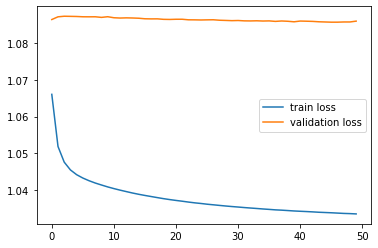

In [27]:
fig, axes = plt.subplots()
axes.plot(train_losses, label='train loss')
axes.plot(val_losses, label='validation loss')
axes.legend()
plt.show()

In [28]:
model = torch.load('LinearRegression')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)
    
    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)    
all_predictions = np.concatenate(all_predictions)    

In [29]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.36707573054797366
              precision    recall  f1-score   support

           0     0.3613    0.6765    0.4711     47976
           1     0.0000    0.0000    0.0000     48060
           2     0.3774    0.4313    0.4026     43551

    accuracy                         0.3671    139587
   macro avg     0.2463    0.3693    0.2912    139587
weighted avg     0.2420    0.3671    0.2875    139587



/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


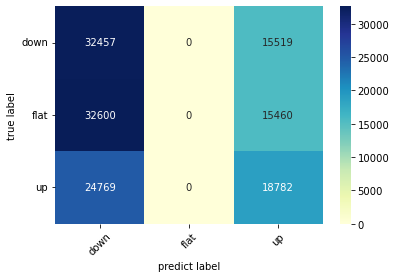

In [40]:
conf_mat = confusion_matrix(all_targets, all_predictions)
df_cm = pd.DataFrame(conf_mat, index=['down','flat','up'], columns=['down','flat','up'])
heatmap = sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.show()

In [27]:
def cut_df(file_path, n):
    df = np.loadtxt(file_path)
    df = pd.DataFrame(df).T
    df_num = len(df)
    every_epoch_num = math.floor((df_num/n))
    for index in tqdm(range(n)):
        file_name = f'../../data/processed/test9_part{index}.txt'
        if index < n-1:
            df_tem = df[every_epoch_num * index: every_epoch_num * (index + 1)]
        else:
            df_tem = df[every_epoch_num * index:]
        array = np.array(df_tem.T)
        np.savetxt(file_name,array)

In [28]:
cut_df('../../data/data/Test_Dst_NoAuction_DecPre_CF_9.txt', 5)

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


In [29]:
data = np.loadtxt('../../data/processed/test9_part4.txt')
df = pd.DataFrame(data.T)

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.3770,0.01309,0.3766,0.00248,0.3771,0.01268,0.3765,0.00390,0.3772,0.01067,...,0.059450,0.059450,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
1,0.3770,0.01309,0.3766,0.00248,0.3771,0.01268,0.3765,0.00390,0.3772,0.01067,...,0.152314,0.152314,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.3770,0.01309,0.3766,0.00248,0.3771,0.01268,0.3765,0.00490,0.3772,0.01067,...,0.134157,0.134157,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,0.3770,0.01309,0.3766,0.00248,0.3771,0.01268,0.3765,0.00490,0.3772,0.01067,...,0.140227,0.140227,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
4,0.3770,0.01309,0.3766,0.00248,0.3771,0.01268,0.3765,0.00390,0.3772,0.01067,...,0.130388,0.130388,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,0.3783,0.01131,0.3782,0.00877,0.3784,0.00775,0.3778,0.00413,0.3785,0.02200,...,0.211415,0.211415,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
6385,0.3783,0.01131,0.3782,0.00877,0.3784,0.00775,0.3778,0.00313,0.3785,0.02200,...,0.000387,0.000387,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
6386,0.3783,0.01131,0.3782,0.00877,0.3784,0.00775,0.3778,0.00213,0.3785,0.02200,...,0.028877,0.028877,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
6387,0.3783,0.01131,0.3782,0.00877,0.3784,0.00775,0.3779,0.00100,0.3785,0.02200,...,0.111147,0.111147,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0


# CNN

In [28]:
traint7path = '../../data/processed/stock4/train7_part4.txt'
test7path = '../../data/processed/stock4/test7_part4.txt'
test8path = '../../data/processed/stock4/test8_part4.txt'
test9path = '../../data/processed/stock4/test9_part4.txt'

In [29]:
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,traint7path,test7path,test8path,test9path)

In [30]:
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=4,num_classes=3,T=100,batch_size=64)

In [31]:
for x,y in train_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1, 100, 40])
torch.Size([64])


In [71]:
class ConvNet(nn.Module):
    def __init__(self, y_len):
        super(ConvNet, self).__init__()
        # convolution blocks
        self.y_len = y_len
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            # nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            # nn.LeakyReLU(negative_slope=0.01),
            # nn.BatchNorm2d(32),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            # nn.BatchNorm2d(32),
            # nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            # nn.Tanh(),
            # nn.BatchNorm2d(32),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,10)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            # nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            # nn.LeakyReLU(negative_slope=0.01),
            # nn.BatchNorm2d(32),
        )
        
        # inception moduels
        # self.inp1 = nn.Sequential(
        #     nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
        #     nn.LeakyReLU(negative_slope=0.01),
        #     nn.BatchNorm2d(64),
        #     nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,1), padding='same'),
        #     nn.LeakyReLU(negative_slope=0.01),
        #     nn.BatchNorm2d(64),
        # )
        # self.inp2 = nn.Sequential(
        #     nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
        #     nn.LeakyReLU(negative_slope=0.01),
        #     nn.BatchNorm2d(64),
        #     nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(5,1), padding='same'),
        #     nn.LeakyReLU(negative_slope=0.01),
        #     nn.BatchNorm2d(64),
        # )
        # self.inp3 = nn.Sequential(
        #     nn.MaxPool2d((3, 1), stride=(1, 1), padding=(1, 0)),
        #     nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,1), padding='same'),
        #     nn.LeakyReLU(negative_slope=0.01),
        #     nn.BatchNorm2d(64),
        # )

        self.fc1 = nn.Linear(2912, self.y_len)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        # x_inp1 = self.inp1(x)
        # x_inp2 = self.inp2(x)
        # x_inp3 = self.inp3(x)  
        
        # x = torch.cat((x, x_inp3), dim=1)
        
#         x = torch.transpose(x, 1, 2)
        # x = x.permute(0, 2, 1, 3)
        # x = torch.reshape(x, (-1, x.shape[1], x.shape[2]))
        
        x = x.flatten(1)
        x = self.fc1(x)
        forecast_y = torch.softmax(x, dim=1)
        return forecast_y

In [72]:
model = ConvNet(y_len=3)
model.to(device)

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
  )
  (conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 10), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): Bat

In [73]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
ConvNet                                  --                        --
├─Sequential: 1-1                        [64, 32, 97, 20]          --
│    └─Conv2d: 2-1                       [64, 32, 100, 20]         96
│    └─LeakyReLU: 2-2                    [64, 32, 100, 20]         --
│    └─BatchNorm2d: 2-3                  [64, 32, 100, 20]         64
│    └─Conv2d: 2-4                       [64, 32, 97, 20]          4,128
│    └─LeakyReLU: 2-5                    [64, 32, 97, 20]          --
│    └─BatchNorm2d: 2-6                  [64, 32, 97, 20]          64
├─Sequential: 1-2                        [64, 32, 94, 10]          --
│    └─Conv2d: 2-7                       [64, 32, 97, 10]          2,080
│    └─Tanh: 2-8                         [64, 32, 97, 10]          --
│    └─BatchNorm2d: 2-9                  [64, 32, 97, 10]          64
│    └─Conv2d: 2-10                      [64, 32, 94, 10]          4,128
│    └

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='CNN')

  2%|▏         | 1/50 [00:04<03:55,  4.80s/it]

model saved
Epoch 1/50, Train Loss: 1.0075,           Validation Loss: 1.0782, Duration: 0:00:04.797696, Best Val Epoch: 0


  4%|▍         | 2/50 [00:09<03:44,  4.67s/it]

model saved
Epoch 2/50, Train Loss: 0.8982,           Validation Loss: 1.0221, Duration: 0:00:04.583758, Best Val Epoch: 1


  6%|▌         | 3/50 [00:14<03:38,  4.65s/it]

model saved
Epoch 3/50, Train Loss: 0.8530,           Validation Loss: 1.0199, Duration: 0:00:04.632765, Best Val Epoch: 2


  8%|▊         | 4/50 [00:18<03:33,  4.65s/it]

Epoch 4/50, Train Loss: 0.8188,           Validation Loss: 1.0568, Duration: 0:00:04.637476, Best Val Epoch: 2


 10%|█         | 5/50 [00:23<03:29,  4.66s/it]

Epoch 5/50, Train Loss: 0.7848,           Validation Loss: 1.1834, Duration: 0:00:04.690346, Best Val Epoch: 2


 12%|█▏        | 6/50 [00:28<03:26,  4.69s/it]

Epoch 6/50, Train Loss: 0.7579,           Validation Loss: 1.1125, Duration: 0:00:04.733400, Best Val Epoch: 2


 14%|█▍        | 7/50 [00:32<03:21,  4.68s/it]

model saved
Epoch 7/50, Train Loss: 0.7400,           Validation Loss: 0.9908, Duration: 0:00:04.654930, Best Val Epoch: 6


 16%|█▌        | 8/50 [00:37<03:15,  4.67s/it]

model saved
Epoch 8/50, Train Loss: 0.7267,           Validation Loss: 0.8950, Duration: 0:00:04.641360, Best Val Epoch: 7


 18%|█▊        | 9/50 [00:41<03:10,  4.64s/it]

Epoch 9/50, Train Loss: 0.7137,           Validation Loss: 1.1403, Duration: 0:00:04.579813, Best Val Epoch: 7


 20%|██        | 10/50 [00:46<03:05,  4.64s/it]

model saved
Epoch 10/50, Train Loss: 0.7033,           Validation Loss: 0.8487, Duration: 0:00:04.655680, Best Val Epoch: 9


 22%|██▏       | 11/50 [00:51<03:01,  4.65s/it]

Epoch 11/50, Train Loss: 0.6966,           Validation Loss: 0.9213, Duration: 0:00:04.653535, Best Val Epoch: 9


 24%|██▍       | 12/50 [00:55<02:56,  4.65s/it]

model saved
Epoch 12/50, Train Loss: 0.6880,           Validation Loss: 0.8470, Duration: 0:00:04.668030, Best Val Epoch: 11


 26%|██▌       | 13/50 [01:00<02:50,  4.60s/it]

Epoch 13/50, Train Loss: 0.6811,           Validation Loss: 1.2185, Duration: 0:00:04.475688, Best Val Epoch: 11


 28%|██▊       | 14/50 [01:04<02:44,  4.56s/it]

Epoch 14/50, Train Loss: 0.6785,           Validation Loss: 1.0239, Duration: 0:00:04.470912, Best Val Epoch: 11


 30%|███       | 15/50 [01:09<02:41,  4.61s/it]

Epoch 15/50, Train Loss: 0.6737,           Validation Loss: 1.2166, Duration: 0:00:04.717451, Best Val Epoch: 11


 32%|███▏      | 16/50 [01:14<02:36,  4.60s/it]

Epoch 16/50, Train Loss: 0.6680,           Validation Loss: 1.1291, Duration: 0:00:04.585032, Best Val Epoch: 11


 34%|███▍      | 17/50 [01:18<02:31,  4.59s/it]

Epoch 17/50, Train Loss: 0.6625,           Validation Loss: 0.9672, Duration: 0:00:04.552796, Best Val Epoch: 11


 36%|███▌      | 18/50 [01:23<02:28,  4.64s/it]

Epoch 18/50, Train Loss: 0.6594,           Validation Loss: 1.1763, Duration: 0:00:04.748976, Best Val Epoch: 11


 38%|███▊      | 19/50 [01:28<02:28,  4.79s/it]

Epoch 19/50, Train Loss: 0.6575,           Validation Loss: 1.1860, Duration: 0:00:05.141725, Best Val Epoch: 11


 40%|████      | 20/50 [01:33<02:26,  4.89s/it]

Epoch 20/50, Train Loss: 0.6541,           Validation Loss: 0.8523, Duration: 0:00:05.135991, Best Val Epoch: 11


 42%|████▏     | 21/50 [01:39<02:24,  5.00s/it]

Epoch 21/50, Train Loss: 0.6510,           Validation Loss: 1.1482, Duration: 0:00:05.247160, Best Val Epoch: 11


 44%|████▍     | 22/50 [01:44<02:22,  5.07s/it]

Epoch 22/50, Train Loss: 0.6481,           Validation Loss: 1.0706, Duration: 0:00:05.243414, Best Val Epoch: 11


 46%|████▌     | 23/50 [01:49<02:14,  4.98s/it]

Epoch 23/50, Train Loss: 0.6458,           Validation Loss: 0.8543, Duration: 0:00:04.747033, Best Val Epoch: 11


 48%|████▊     | 24/50 [01:53<02:07,  4.89s/it]

Epoch 24/50, Train Loss: 0.6444,           Validation Loss: 0.9171, Duration: 0:00:04.685031, Best Val Epoch: 11


 50%|█████     | 25/50 [01:58<01:58,  4.76s/it]

Epoch 25/50, Train Loss: 0.6406,           Validation Loss: 0.9013, Duration: 0:00:04.456676, Best Val Epoch: 11


 52%|█████▏    | 26/50 [02:02<01:52,  4.69s/it]

Epoch 26/50, Train Loss: 0.6392,           Validation Loss: 1.1477, Duration: 0:00:04.533669, Best Val Epoch: 11


 54%|█████▍    | 27/50 [02:07<01:48,  4.73s/it]

Epoch 27/50, Train Loss: 0.6369,           Validation Loss: 1.0259, Duration: 0:00:04.822284, Best Val Epoch: 11


 56%|█████▌    | 28/50 [02:12<01:43,  4.71s/it]

Epoch 28/50, Train Loss: 0.6349,           Validation Loss: 1.0077, Duration: 0:00:04.665510, Best Val Epoch: 11


 58%|█████▊    | 29/50 [02:16<01:39,  4.73s/it]

model saved
Epoch 29/50, Train Loss: 0.6314,           Validation Loss: 0.8158, Duration: 0:00:04.772975, Best Val Epoch: 28


 60%|██████    | 30/50 [02:21<01:34,  4.74s/it]

Epoch 30/50, Train Loss: 0.6312,           Validation Loss: 0.8262, Duration: 0:00:04.768367, Best Val Epoch: 28


 62%|██████▏   | 31/50 [02:26<01:30,  4.77s/it]

Epoch 31/50, Train Loss: 0.6304,           Validation Loss: 1.2008, Duration: 0:00:04.830138, Best Val Epoch: 28


 64%|██████▍   | 32/50 [02:31<01:26,  4.78s/it]

Epoch 32/50, Train Loss: 0.6276,           Validation Loss: 0.9248, Duration: 0:00:04.806860, Best Val Epoch: 28


 66%|██████▌   | 33/50 [02:36<01:21,  4.82s/it]

Epoch 33/50, Train Loss: 0.6259,           Validation Loss: 0.8938, Duration: 0:00:04.903518, Best Val Epoch: 28


 68%|██████▊   | 34/50 [02:41<01:17,  4.82s/it]

Epoch 34/50, Train Loss: 0.6247,           Validation Loss: 0.8855, Duration: 0:00:04.829106, Best Val Epoch: 28


 70%|███████   | 35/50 [02:45<01:11,  4.79s/it]

Epoch 35/50, Train Loss: 0.6235,           Validation Loss: 0.8862, Duration: 0:00:04.722044, Best Val Epoch: 28


 72%|███████▏  | 36/50 [02:50<01:06,  4.75s/it]

Epoch 36/50, Train Loss: 0.6216,           Validation Loss: 0.8220, Duration: 0:00:04.659658, Best Val Epoch: 28


 74%|███████▍  | 37/50 [02:55<01:01,  4.75s/it]

Epoch 37/50, Train Loss: 0.6203,           Validation Loss: 1.0688, Duration: 0:00:04.741034, Best Val Epoch: 28


 76%|███████▌  | 38/50 [02:59<00:56,  4.74s/it]

Epoch 38/50, Train Loss: 0.6187,           Validation Loss: 0.9812, Duration: 0:00:04.706707, Best Val Epoch: 28


 78%|███████▊  | 39/50 [03:04<00:51,  4.72s/it]

Epoch 39/50, Train Loss: 0.6186,           Validation Loss: 0.8622, Duration: 0:00:04.691957, Best Val Epoch: 28


 80%|████████  | 40/50 [03:09<00:46,  4.67s/it]

Epoch 40/50, Train Loss: 0.6163,           Validation Loss: 0.9693, Duration: 0:00:04.547254, Best Val Epoch: 28


 82%|████████▏ | 41/50 [03:13<00:41,  4.64s/it]

model saved
Epoch 41/50, Train Loss: 0.6162,           Validation Loss: 0.8046, Duration: 0:00:04.575012, Best Val Epoch: 40


 84%|████████▍ | 42/50 [03:18<00:36,  4.62s/it]

Epoch 42/50, Train Loss: 0.6136,           Validation Loss: 0.8369, Duration: 0:00:04.569295, Best Val Epoch: 40


 86%|████████▌ | 43/50 [03:22<00:32,  4.63s/it]

Epoch 43/50, Train Loss: 0.6150,           Validation Loss: 1.1913, Duration: 0:00:04.643112, Best Val Epoch: 40


 88%|████████▊ | 44/50 [03:27<00:27,  4.63s/it]

Epoch 44/50, Train Loss: 0.6135,           Validation Loss: 1.2073, Duration: 0:00:04.633125, Best Val Epoch: 40


 90%|█████████ | 45/50 [03:32<00:23,  4.67s/it]

Epoch 45/50, Train Loss: 0.6111,           Validation Loss: 1.0461, Duration: 0:00:04.749875, Best Val Epoch: 40


 92%|█████████▏| 46/50 [03:37<00:18,  4.72s/it]

Epoch 46/50, Train Loss: 0.6115,           Validation Loss: 0.9547, Duration: 0:00:04.829897, Best Val Epoch: 40


 94%|█████████▍| 47/50 [03:41<00:14,  4.72s/it]

Epoch 47/50, Train Loss: 0.6106,           Validation Loss: 0.8409, Duration: 0:00:04.736603, Best Val Epoch: 40


 96%|█████████▌| 48/50 [03:46<00:09,  4.70s/it]

Epoch 48/50, Train Loss: 0.6091,           Validation Loss: 1.1933, Duration: 0:00:04.659172, Best Val Epoch: 40


 98%|█████████▊| 49/50 [03:51<00:04,  4.69s/it]

Epoch 49/50, Train Loss: 0.6089,           Validation Loss: 0.9361, Duration: 0:00:04.659972, Best Val Epoch: 40


100%|██████████| 50/50 [03:55<00:00,  4.72s/it]

Epoch 50/50, Train Loss: 0.6078,           Validation Loss: 0.9056, Duration: 0:00:04.695387, Best Val Epoch: 40


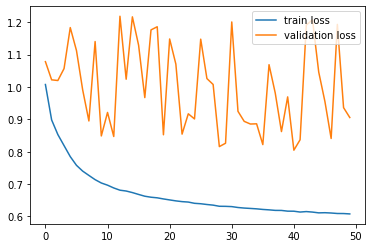

In [75]:
p.drawLossChange(train_losses, val_losses)

In [76]:
model = torch.load('CNN')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.4478    0.5337    0.4870      7785
           1     0.7283    0.3731    0.4934     13112
           2     0.4120    0.7035    0.5196      6927

    accuracy                         0.5003     27824
   macro avg     0.5294    0.5368    0.5000     27824
weighted avg     0.5711    0.5003    0.4982     27824



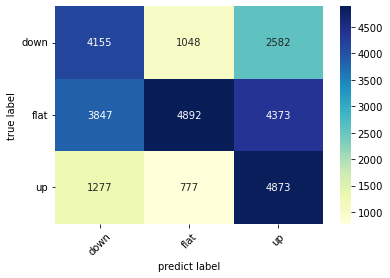

In [77]:
p.seeConfusionMatrix(all_targets,all_predictions)

# LSTM

In [140]:
traint7path = '../../data/processed/stock3/train7_part3.txt'
test7path = '../../data/processed/stock3/test7_part3.txt'
test8path = '../../data/processed/stock3/test8_part3.txt'
test9path = '../../data/processed/stock3/test9_part3.txt'

In [141]:
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,traint7path,test7path,test8path,test9path)
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=4,num_classes=3,T=100,batch_size=64)

In [142]:
class LstmNet(nn.Module):
    def __init__(self, y_len, device, hidden_size=64):
        self.device = device
        self.hidden_size = hidden_size
        super(LstmNet, self).__init__()
        self.conv1 = nn.Sequential( nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,2), stride=(1,2)),
                                    nn.LeakyReLU(negative_slope=0.01),
                                    nn.BatchNorm2d(32),
                                    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
                                    nn.LeakyReLU(negative_slope=0.01),
                                    nn.BatchNorm2d(32),
                                    )
        self.conv2 = nn.Sequential(
                                    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,2), stride=(1,2)),
                                    nn.Tanh(),
                                    nn.BatchNorm2d(32),
                                    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
                                    nn.Tanh(),
                                    nn.BatchNorm2d(32),
                                )
        self.conv3 = nn.Sequential( nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,10)),
                                    nn.LeakyReLU(negative_slope=0.01),
                                    nn.BatchNorm2d(32),
                                    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
                                    nn.LeakyReLU(negative_slope=0.01),
                                    nn.BatchNorm2d(32),
                                    )
        # set size
        self.lstm = nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=1, batch_first=True)
        # self.relu = nn.LeakyReLU(negative_slope=0.01),
        self.fc1 = nn.Linear(hidden_size, y_len)     

    def forward(self, x):
        # h0: (number of hidden layers, batch size, hidden size)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(self.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(self.device)
    
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x = x.permute(0, 2, 1, 3)
        x = torch.reshape(x, (-1, x.shape[1], x.shape[2]))
        x, _ = self.lstm(x, (h0, c0))
        x = x[:, -1, :]
  
        x = self.fc1(x)
        forecast_y = torch.softmax(x, dim=1)
        return forecast_y

In [143]:
model = LstmNet(y_len=3, device=device, hidden_size=64)
model.to(device)

LstmNet(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 10), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32

In [145]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
LstmNet                                  --                        --
├─Sequential: 1-1                        [64, 32, 97, 20]          --
│    └─Conv2d: 2-1                       [64, 32, 100, 20]         96
│    └─LeakyReLU: 2-2                    [64, 32, 100, 20]         --
│    └─BatchNorm2d: 2-3                  [64, 32, 100, 20]         64
│    └─Conv2d: 2-4                       [64, 32, 97, 20]          4,128
│    └─LeakyReLU: 2-5                    [64, 32, 97, 20]          --
│    └─BatchNorm2d: 2-6                  [64, 32, 97, 20]          64
├─Sequential: 1-2                        [64, 32, 94, 10]          --
│    └─Conv2d: 2-7                       [64, 32, 97, 10]          2,080
│    └─Tanh: 2-8                         [64, 32, 97, 10]          --
│    └─BatchNorm2d: 2-9                  [64, 32, 97, 10]          64
│    └─Conv2d: 2-10                      [64, 32, 94, 10]          4,128
│    └

In [146]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='LSTM')

  2%|▏         | 1/50 [00:07<06:02,  7.41s/it]

model saved
Epoch 1/50, Train Loss: 1.0262,           Validation Loss: 1.0007, Duration: 0:00:07.407189, Best Val Epoch: 0


  4%|▍         | 2/50 [00:14<05:46,  7.22s/it]

Epoch 2/50, Train Loss: 0.9196,           Validation Loss: 1.0108, Duration: 0:00:07.093370, Best Val Epoch: 0


  6%|▌         | 3/50 [00:21<05:37,  7.17s/it]

model saved
Epoch 3/50, Train Loss: 0.8717,           Validation Loss: 0.9510, Duration: 0:00:07.108272, Best Val Epoch: 2


  8%|▊         | 4/50 [00:28<05:29,  7.16s/it]

Epoch 4/50, Train Loss: 0.8445,           Validation Loss: 0.9727, Duration: 0:00:07.140861, Best Val Epoch: 2


 10%|█         | 5/50 [00:35<05:21,  7.14s/it]

Epoch 5/50, Train Loss: 0.8215,           Validation Loss: 0.9533, Duration: 0:00:07.092582, Best Val Epoch: 2


 12%|█▏        | 6/50 [00:43<05:16,  7.20s/it]

model saved
Epoch 6/50, Train Loss: 0.8051,           Validation Loss: 0.9354, Duration: 0:00:07.311639, Best Val Epoch: 5


 14%|█▍        | 7/50 [00:50<05:10,  7.23s/it]

model saved
Epoch 7/50, Train Loss: 0.7929,           Validation Loss: 0.9348, Duration: 0:00:07.299970, Best Val Epoch: 6


 16%|█▌        | 8/50 [00:57<05:05,  7.26s/it]

Epoch 8/50, Train Loss: 0.7846,           Validation Loss: 0.9801, Duration: 0:00:07.329655, Best Val Epoch: 6


 18%|█▊        | 9/50 [01:05<04:58,  7.27s/it]

model saved
Epoch 9/50, Train Loss: 0.7761,           Validation Loss: 0.9238, Duration: 0:00:07.286588, Best Val Epoch: 8


 20%|██        | 10/50 [01:12<04:48,  7.21s/it]

Epoch 10/50, Train Loss: 0.7698,           Validation Loss: 0.9273, Duration: 0:00:07.071867, Best Val Epoch: 8


 22%|██▏       | 11/50 [01:19<04:38,  7.13s/it]

Epoch 11/50, Train Loss: 0.7629,           Validation Loss: 0.9296, Duration: 0:00:06.962515, Best Val Epoch: 8


 24%|██▍       | 12/50 [01:26<04:28,  7.06s/it]

Epoch 12/50, Train Loss: 0.7577,           Validation Loss: 0.9251, Duration: 0:00:06.904580, Best Val Epoch: 8


 26%|██▌       | 13/50 [01:33<04:22,  7.09s/it]

Epoch 13/50, Train Loss: 0.7529,           Validation Loss: 0.9448, Duration: 0:00:07.152022, Best Val Epoch: 8


 28%|██▊       | 14/50 [01:40<04:15,  7.10s/it]

Epoch 14/50, Train Loss: 0.7490,           Validation Loss: 0.9494, Duration: 0:00:07.114384, Best Val Epoch: 8


 30%|███       | 15/50 [01:47<04:06,  7.03s/it]

Epoch 15/50, Train Loss: 0.7429,           Validation Loss: 0.9502, Duration: 0:00:06.874848, Best Val Epoch: 8


 32%|███▏      | 16/50 [01:54<03:57,  7.00s/it]

Epoch 16/50, Train Loss: 0.7399,           Validation Loss: 0.9319, Duration: 0:00:06.915593, Best Val Epoch: 8


 34%|███▍      | 17/50 [02:01<03:51,  7.00s/it]

Epoch 17/50, Train Loss: 0.7373,           Validation Loss: 1.0047, Duration: 0:00:07.018246, Best Val Epoch: 8


 36%|███▌      | 18/50 [02:08<03:43,  6.99s/it]

Epoch 18/50, Train Loss: 0.7335,           Validation Loss: 0.9676, Duration: 0:00:06.950295, Best Val Epoch: 8


 38%|███▊      | 19/50 [02:14<03:35,  6.95s/it]

Epoch 19/50, Train Loss: 0.7319,           Validation Loss: 0.9545, Duration: 0:00:06.856193, Best Val Epoch: 8


 40%|████      | 20/50 [02:21<03:28,  6.97s/it]

Epoch 20/50, Train Loss: 0.7264,           Validation Loss: 0.9335, Duration: 0:00:07.004348, Best Val Epoch: 8


 42%|████▏     | 21/50 [02:28<03:21,  6.95s/it]

Epoch 21/50, Train Loss: 0.7252,           Validation Loss: 0.9293, Duration: 0:00:06.914984, Best Val Epoch: 8


 44%|████▍     | 22/50 [02:35<03:13,  6.92s/it]

Epoch 22/50, Train Loss: 0.7231,           Validation Loss: 0.9477, Duration: 0:00:06.856390, Best Val Epoch: 8


 46%|████▌     | 23/50 [02:42<03:06,  6.90s/it]

Epoch 23/50, Train Loss: 0.7207,           Validation Loss: 0.9413, Duration: 0:00:06.834884, Best Val Epoch: 8


 48%|████▊     | 24/50 [02:49<03:01,  6.99s/it]

Epoch 24/50, Train Loss: 0.7196,           Validation Loss: 0.9494, Duration: 0:00:07.202215, Best Val Epoch: 8


 50%|█████     | 25/50 [02:56<02:54,  6.99s/it]

Epoch 25/50, Train Loss: 0.7166,           Validation Loss: 0.9420, Duration: 0:00:07.005342, Best Val Epoch: 8


 52%|█████▏    | 26/50 [03:03<02:49,  7.05s/it]

Epoch 26/50, Train Loss: 0.7133,           Validation Loss: 0.9327, Duration: 0:00:07.171314, Best Val Epoch: 8


 54%|█████▍    | 27/50 [03:10<02:41,  7.04s/it]

Epoch 27/50, Train Loss: 0.7135,           Validation Loss: 0.9419, Duration: 0:00:07.031119, Best Val Epoch: 8


 56%|█████▌    | 28/50 [03:18<02:36,  7.12s/it]

Epoch 28/50, Train Loss: 0.7115,           Validation Loss: 0.9442, Duration: 0:00:07.302863, Best Val Epoch: 8


 58%|█████▊    | 29/50 [03:25<02:29,  7.12s/it]

Epoch 29/50, Train Loss: 0.7103,           Validation Loss: 0.9702, Duration: 0:00:07.128552, Best Val Epoch: 8


 60%|██████    | 30/50 [03:32<02:22,  7.12s/it]

Epoch 30/50, Train Loss: 0.7088,           Validation Loss: 0.9374, Duration: 0:00:07.104117, Best Val Epoch: 8


 62%|██████▏   | 31/50 [03:39<02:15,  7.11s/it]

Epoch 31/50, Train Loss: 0.7072,           Validation Loss: 0.9376, Duration: 0:00:07.096882, Best Val Epoch: 8


 64%|██████▍   | 32/50 [03:46<02:08,  7.12s/it]

Epoch 32/50, Train Loss: 0.7049,           Validation Loss: 0.9411, Duration: 0:00:07.141700, Best Val Epoch: 8


 66%|██████▌   | 33/50 [03:54<02:02,  7.18s/it]

Epoch 33/50, Train Loss: 0.7038,           Validation Loss: 0.9498, Duration: 0:00:07.326065, Best Val Epoch: 8


 68%|██████▊   | 34/50 [04:01<01:55,  7.23s/it]

Epoch 34/50, Train Loss: 0.7015,           Validation Loss: 0.9502, Duration: 0:00:07.353840, Best Val Epoch: 8


 70%|███████   | 35/50 [04:08<01:48,  7.24s/it]

Epoch 35/50, Train Loss: 0.7017,           Validation Loss: 0.9931, Duration: 0:00:07.247919, Best Val Epoch: 8


 72%|███████▏  | 36/50 [04:15<01:41,  7.24s/it]

Epoch 36/50, Train Loss: 0.6999,           Validation Loss: 0.9793, Duration: 0:00:07.236793, Best Val Epoch: 8


 74%|███████▍  | 37/50 [04:23<01:33,  7.21s/it]

Epoch 37/50, Train Loss: 0.6991,           Validation Loss: 0.9796, Duration: 0:00:07.151725, Best Val Epoch: 8


 76%|███████▌  | 38/50 [04:30<01:26,  7.19s/it]

Epoch 38/50, Train Loss: 0.6970,           Validation Loss: 0.9367, Duration: 0:00:07.136550, Best Val Epoch: 8


 78%|███████▊  | 39/50 [04:37<01:19,  7.21s/it]

Epoch 39/50, Train Loss: 0.6960,           Validation Loss: 0.9481, Duration: 0:00:07.245976, Best Val Epoch: 8


 80%|████████  | 40/50 [04:44<01:12,  7.24s/it]

Epoch 40/50, Train Loss: 0.6955,           Validation Loss: 0.9297, Duration: 0:00:07.329972, Best Val Epoch: 8


 82%|████████▏ | 41/50 [04:52<01:07,  7.52s/it]

model saved
Epoch 41/50, Train Loss: 0.6944,           Validation Loss: 0.9213, Duration: 0:00:08.177209, Best Val Epoch: 40


 84%|████████▍ | 42/50 [05:00<01:01,  7.64s/it]

Epoch 42/50, Train Loss: 0.6938,           Validation Loss: 0.9350, Duration: 0:00:07.910975, Best Val Epoch: 40


 86%|████████▌ | 43/50 [05:08<00:52,  7.52s/it]

Epoch 43/50, Train Loss: 0.6925,           Validation Loss: 0.9417, Duration: 0:00:07.246220, Best Val Epoch: 40


 88%|████████▊ | 44/50 [05:15<00:44,  7.45s/it]

Epoch 44/50, Train Loss: 0.6918,           Validation Loss: 0.9438, Duration: 0:00:07.294431, Best Val Epoch: 40


 90%|█████████ | 45/50 [05:22<00:37,  7.41s/it]

Epoch 45/50, Train Loss: 0.6900,           Validation Loss: 0.9458, Duration: 0:00:07.311716, Best Val Epoch: 40


 92%|█████████▏| 46/50 [05:30<00:29,  7.42s/it]

Epoch 46/50, Train Loss: 0.6910,           Validation Loss: 0.9397, Duration: 0:00:07.445807, Best Val Epoch: 40


 94%|█████████▍| 47/50 [05:37<00:22,  7.46s/it]

Epoch 47/50, Train Loss: 0.6897,           Validation Loss: 0.9530, Duration: 0:00:07.543747, Best Val Epoch: 40


 96%|█████████▌| 48/50 [05:44<00:14,  7.39s/it]

Epoch 48/50, Train Loss: 0.6878,           Validation Loss: 0.9483, Duration: 0:00:07.212753, Best Val Epoch: 40


 98%|█████████▊| 49/50 [05:52<00:07,  7.38s/it]

Epoch 49/50, Train Loss: 0.6885,           Validation Loss: 0.9687, Duration: 0:00:07.372428, Best Val Epoch: 40


100%|██████████| 50/50 [05:59<00:00,  7.19s/it]

Epoch 50/50, Train Loss: 0.6855,           Validation Loss: 0.9293, Duration: 0:00:07.183206, Best Val Epoch: 40


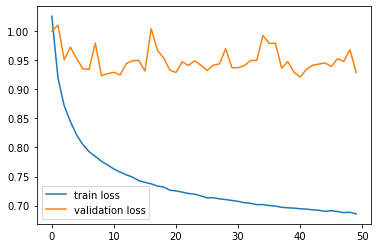

In [147]:
p.drawLossChange(train_losses, val_losses)

In [148]:
model = torch.load('LSTM')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.5753    0.4849    0.5263      9901
           1     0.6075    0.6001    0.6038      9464
           2     0.4861    0.5822    0.5298      8452

    accuracy                         0.5537     27817
   macro avg     0.5563    0.5557    0.5533     27817
weighted avg     0.5592    0.5537    0.5537     27817



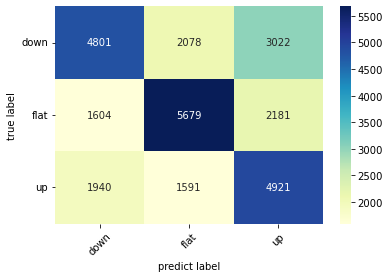

In [149]:
p.seeConfusionMatrix(all_targets,all_predictions)

### 对于原序数据集 也newY

In [22]:
inpath = '../../data/processed/stock4/test9_part4.csv'
df = pd.read_csv(inpath)
outdf = prepare.changeDF(df)
outdf.to_csv('../../data/processed/stock4/newY_test9_part4.csv', index=False)

In [3]:
train7path = '../../data/processed/stock3/newY_train7_part3.csv'
test7path = '../../data/processed/stock3/newY_test7_part3.csv'
test8path = '../../data/processed/stock3/newY_test8_part3.csv'
test9path = '../../data/processed/stock3/newY_test9_part3.csv'
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,train7path,test7path,test8path,test9path)
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=-4,num_classes=3,T=100,batch_size=64)

In [4]:
model = baseline.LstmNet(y_len=3, device=device, hidden_size=64)
model.to(device)

LstmNet(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 10), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32

In [29]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
LstmNet                                  --                        --
├─Sequential: 1-1                        [64, 32, 97, 20]          --
│    └─Conv2d: 2-1                       [64, 32, 100, 20]         96
│    └─LeakyReLU: 2-2                    [64, 32, 100, 20]         --
│    └─BatchNorm2d: 2-3                  [64, 32, 100, 20]         64
│    └─Conv2d: 2-4                       [64, 32, 97, 20]          4,128
│    └─LeakyReLU: 2-5                    [64, 32, 97, 20]          --
│    └─BatchNorm2d: 2-6                  [64, 32, 97, 20]          64
├─Sequential: 1-2                        [64, 32, 94, 10]          --
│    └─Conv2d: 2-7                       [64, 32, 97, 10]          2,080
│    └─Tanh: 2-8                         [64, 32, 97, 10]          --
│    └─BatchNorm2d: 2-9                  [64, 32, 97, 10]          64
│    └─Conv2d: 2-10                      [64, 32, 94, 10]          4,128
│    └

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='./savedModels_rightOrder/newY_LSTM')

  2%|▏         | 1/50 [00:07<06:09,  7.54s/it]

model saved
Epoch 1/50, Train Loss: 1.0335,           Validation Loss: 1.0299, Duration: 0:00:07.544629, Best Val Epoch: 0


  4%|▍         | 2/50 [00:14<05:52,  7.35s/it]

Epoch 2/50, Train Loss: 0.9217,           Validation Loss: 1.0642, Duration: 0:00:07.211858, Best Val Epoch: 0


  6%|▌         | 3/50 [00:21<05:42,  7.29s/it]

model saved
Epoch 3/50, Train Loss: 0.8754,           Validation Loss: 0.9456, Duration: 0:00:07.217054, Best Val Epoch: 2


  8%|▊         | 4/50 [00:29<05:35,  7.29s/it]

model saved
Epoch 4/50, Train Loss: 0.8486,           Validation Loss: 0.9282, Duration: 0:00:07.289501, Best Val Epoch: 3


 10%|█         | 5/50 [00:36<05:25,  7.24s/it]

Epoch 5/50, Train Loss: 0.8286,           Validation Loss: 0.9318, Duration: 0:00:07.136291, Best Val Epoch: 3


 12%|█▏        | 6/50 [00:43<05:16,  7.18s/it]

model saved
Epoch 6/50, Train Loss: 0.8136,           Validation Loss: 0.9095, Duration: 0:00:07.082972, Best Val Epoch: 5


 14%|█▍        | 7/50 [00:50<05:09,  7.19s/it]

Epoch 7/50, Train Loss: 0.8017,           Validation Loss: 0.9120, Duration: 0:00:07.204688, Best Val Epoch: 5


 16%|█▌        | 8/50 [00:58<05:03,  7.24s/it]

Epoch 8/50, Train Loss: 0.7927,           Validation Loss: 0.9343, Duration: 0:00:07.325609, Best Val Epoch: 5


 18%|█▊        | 9/50 [01:05<04:54,  7.19s/it]

Epoch 9/50, Train Loss: 0.7848,           Validation Loss: 0.9406, Duration: 0:00:07.099297, Best Val Epoch: 5


 20%|██        | 10/50 [01:12<04:47,  7.18s/it]

Epoch 10/50, Train Loss: 0.7787,           Validation Loss: 0.9177, Duration: 0:00:07.154588, Best Val Epoch: 5


 22%|██▏       | 11/50 [01:19<04:40,  7.19s/it]

model saved
Epoch 11/50, Train Loss: 0.7726,           Validation Loss: 0.9000, Duration: 0:00:07.201774, Best Val Epoch: 10


 24%|██▍       | 12/50 [01:26<04:35,  7.25s/it]

Epoch 12/50, Train Loss: 0.7682,           Validation Loss: 0.9269, Duration: 0:00:07.398623, Best Val Epoch: 10


 26%|██▌       | 13/50 [01:34<04:35,  7.44s/it]

Epoch 13/50, Train Loss: 0.7665,           Validation Loss: 0.9095, Duration: 0:00:07.886364, Best Val Epoch: 10


 28%|██▊       | 14/50 [01:42<04:35,  7.65s/it]

Epoch 14/50, Train Loss: 0.7597,           Validation Loss: 0.9093, Duration: 0:00:08.134167, Best Val Epoch: 10


 30%|███       | 15/50 [01:51<04:37,  7.94s/it]

Epoch 15/50, Train Loss: 0.7560,           Validation Loss: 0.9466, Duration: 0:00:08.602306, Best Val Epoch: 10


 32%|███▏      | 16/50 [02:00<04:36,  8.14s/it]

Epoch 16/50, Train Loss: 0.7518,           Validation Loss: 0.9010, Duration: 0:00:08.598496, Best Val Epoch: 10


 34%|███▍      | 17/50 [02:08<04:33,  8.28s/it]

Epoch 17/50, Train Loss: 0.7480,           Validation Loss: 0.9156, Duration: 0:00:08.619720, Best Val Epoch: 10


 36%|███▌      | 18/50 [02:17<04:28,  8.38s/it]

Epoch 18/50, Train Loss: 0.7459,           Validation Loss: 1.0176, Duration: 0:00:08.601819, Best Val Epoch: 10


 38%|███▊      | 19/50 [02:25<04:21,  8.43s/it]

Epoch 19/50, Train Loss: 0.7417,           Validation Loss: 0.9075, Duration: 0:00:08.562088, Best Val Epoch: 10


 40%|████      | 20/50 [02:34<04:14,  8.48s/it]

Epoch 20/50, Train Loss: 0.7393,           Validation Loss: 0.9007, Duration: 0:00:08.595972, Best Val Epoch: 10


 42%|████▏     | 21/50 [02:43<04:07,  8.53s/it]

Epoch 21/50, Train Loss: 0.7350,           Validation Loss: 0.9112, Duration: 0:00:08.653372, Best Val Epoch: 10


 44%|████▍     | 22/50 [02:51<03:59,  8.56s/it]

Epoch 22/50, Train Loss: 0.7318,           Validation Loss: 0.9465, Duration: 0:00:08.633352, Best Val Epoch: 10


 46%|████▌     | 23/50 [03:00<03:50,  8.55s/it]

Epoch 23/50, Train Loss: 0.7299,           Validation Loss: 0.9722, Duration: 0:00:08.510003, Best Val Epoch: 10


 48%|████▊     | 24/50 [03:09<03:44,  8.63s/it]

Epoch 24/50, Train Loss: 0.7287,           Validation Loss: 0.9073, Duration: 0:00:08.817790, Best Val Epoch: 10


 50%|█████     | 25/50 [03:17<03:36,  8.66s/it]

Epoch 25/50, Train Loss: 0.7255,           Validation Loss: 0.9558, Duration: 0:00:08.723721, Best Val Epoch: 10


 52%|█████▏    | 26/50 [03:26<03:27,  8.66s/it]

Epoch 26/50, Train Loss: 0.7232,           Validation Loss: 0.9195, Duration: 0:00:08.648402, Best Val Epoch: 10


 54%|█████▍    | 27/50 [03:34<03:14,  8.45s/it]

Epoch 27/50, Train Loss: 0.7212,           Validation Loss: 0.9122, Duration: 0:00:07.959358, Best Val Epoch: 10


 56%|█████▌    | 28/50 [03:42<03:01,  8.26s/it]

Epoch 28/50, Train Loss: 0.7193,           Validation Loss: 0.9107, Duration: 0:00:07.836654, Best Val Epoch: 10


 58%|█████▊    | 29/50 [03:50<02:51,  8.18s/it]

Epoch 29/50, Train Loss: 0.7175,           Validation Loss: 0.9051, Duration: 0:00:07.972342, Best Val Epoch: 10


 60%|██████    | 30/50 [03:57<02:36,  7.84s/it]

Epoch 30/50, Train Loss: 0.7144,           Validation Loss: 0.9137, Duration: 0:00:07.045996, Best Val Epoch: 10


 62%|██████▏   | 31/50 [04:04<02:26,  7.71s/it]

Epoch 31/50, Train Loss: 0.7123,           Validation Loss: 0.9291, Duration: 0:00:07.405492, Best Val Epoch: 10


 64%|██████▍   | 32/50 [04:12<02:18,  7.72s/it]

Epoch 32/50, Train Loss: 0.7114,           Validation Loss: 0.9233, Duration: 0:00:07.751725, Best Val Epoch: 10


 66%|██████▌   | 33/50 [04:19<02:07,  7.52s/it]

Epoch 33/50, Train Loss: 0.7095,           Validation Loss: 0.9091, Duration: 0:00:07.056014, Best Val Epoch: 10


 68%|██████▊   | 34/50 [04:26<01:58,  7.39s/it]

Epoch 34/50, Train Loss: 0.7076,           Validation Loss: 0.9289, Duration: 0:00:07.068361, Best Val Epoch: 10


 70%|███████   | 35/50 [04:33<01:48,  7.25s/it]

Epoch 35/50, Train Loss: 0.7062,           Validation Loss: 0.9106, Duration: 0:00:06.923605, Best Val Epoch: 10


 72%|███████▏  | 36/50 [04:40<01:40,  7.15s/it]

model saved
Epoch 36/50, Train Loss: 0.7052,           Validation Loss: 0.8996, Duration: 0:00:06.906457, Best Val Epoch: 35


 74%|███████▍  | 37/50 [04:47<01:33,  7.21s/it]

Epoch 37/50, Train Loss: 0.7053,           Validation Loss: 0.9270, Duration: 0:00:07.347162, Best Val Epoch: 35


 76%|███████▌  | 38/50 [04:55<01:28,  7.40s/it]

Epoch 38/50, Train Loss: 0.7017,           Validation Loss: 0.9045, Duration: 0:00:07.833774, Best Val Epoch: 35


 78%|███████▊  | 39/50 [05:03<01:23,  7.56s/it]

Epoch 39/50, Train Loss: 0.7002,           Validation Loss: 0.9154, Duration: 0:00:07.950524, Best Val Epoch: 35


 80%|████████  | 40/50 [05:11<01:15,  7.53s/it]

Epoch 40/50, Train Loss: 0.7001,           Validation Loss: 0.9125, Duration: 0:00:07.448911, Best Val Epoch: 35


 82%|████████▏ | 41/50 [05:18<01:06,  7.42s/it]

Epoch 41/50, Train Loss: 0.6984,           Validation Loss: 0.9044, Duration: 0:00:07.150932, Best Val Epoch: 35


 84%|████████▍ | 42/50 [05:25<00:58,  7.28s/it]

Epoch 42/50, Train Loss: 0.6965,           Validation Loss: 0.9024, Duration: 0:00:06.961867, Best Val Epoch: 35


 86%|████████▌ | 43/50 [05:31<00:50,  7.15s/it]

Epoch 43/50, Train Loss: 0.6959,           Validation Loss: 0.9191, Duration: 0:00:06.835004, Best Val Epoch: 35


 88%|████████▊ | 44/50 [05:38<00:42,  7.03s/it]

Epoch 44/50, Train Loss: 0.6948,           Validation Loss: 0.9150, Duration: 0:00:06.767371, Best Val Epoch: 35


 90%|█████████ | 45/50 [05:45<00:35,  7.04s/it]

Epoch 45/50, Train Loss: 0.6938,           Validation Loss: 0.9065, Duration: 0:00:07.045924, Best Val Epoch: 35


 92%|█████████▏| 46/50 [05:52<00:27,  6.97s/it]

Epoch 46/50, Train Loss: 0.6903,           Validation Loss: 0.9206, Duration: 0:00:06.799695, Best Val Epoch: 35


 94%|█████████▍| 47/50 [05:59<00:20,  6.92s/it]

Epoch 47/50, Train Loss: 0.6920,           Validation Loss: 0.9245, Duration: 0:00:06.794400, Best Val Epoch: 35


 96%|█████████▌| 48/50 [06:06<00:13,  6.98s/it]

Epoch 48/50, Train Loss: 0.6908,           Validation Loss: 0.9017, Duration: 0:00:07.133539, Best Val Epoch: 35


 98%|█████████▊| 49/50 [06:13<00:07,  7.03s/it]

Epoch 49/50, Train Loss: 0.6878,           Validation Loss: 0.9163, Duration: 0:00:07.133365, Best Val Epoch: 35


100%|██████████| 50/50 [06:21<00:00,  7.62s/it]

Epoch 50/50, Train Loss: 0.6894,           Validation Loss: 0.9104, Duration: 0:00:07.584245, Best Val Epoch: 35


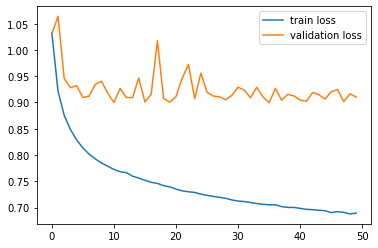

In [6]:
p.drawLossChange(train_losses, val_losses)

In [7]:
model = torch.load('./savedModels_rightOrder/newY_LSTM')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.6087    0.5963    0.6024      9901
           1     0.6557    0.5785    0.6147      9464
           2     0.5199    0.6008    0.5574      8452

    accuracy                         0.5916     27817
   macro avg     0.5948    0.5919    0.5915     27817
weighted avg     0.5977    0.5916    0.5929     27817



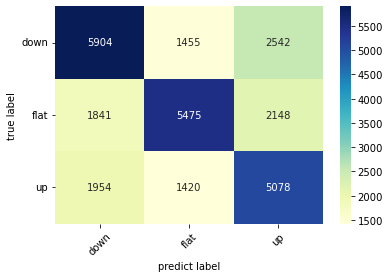

In [8]:
p.seeConfusionMatrix(all_targets,all_predictions) 

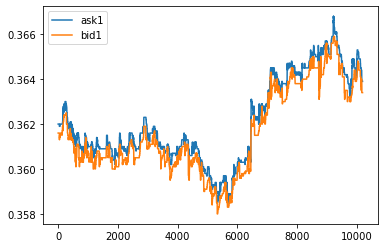

In [13]:
ask1 = np.array(dec_val['0'])
bid1 = np.array(dec_val['2'])
x_list = range(len(ask1))
fig, axes = plt.subplots()
axes.plot(x_list, ask1, label="ask1")
axes.plot(x_list, bid1, label='bid1')
axes.legend()
plt.show()